In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = "/content/drive/My Drive/Colab Notebooks/audio/wavfiles/pitt/"  # Update if needed

In [ ]:
%cd /content/drive/My\ Drive/Colab\ Notebooks/audio/

/content/drive/My Drive/Colab Notebooks/audio


In [ ]:
def save_file(df, name):
    # path='wavfiles/a/'
    # df.to_pickle( name + '.pickle')
    df.to_csv( name + '.csv')
    print('done')

In [ ]:
!pip install pydub


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **get audio file duration**

In [ ]:
import librosa
dur=librosa.get_duration(filename=path+'Dementia'+"/"+'714-0.wav')

<ipython-input-16-d238ee15a403>:2: FutureWarning: get_duration() keyword argument 'filename' has been renamed to 'path' in version 0.10.0.
	This alias will be removed in version 1.0.
  dur=librosa.get_duration(filename=path+'Dementia'+"/"+'714-0.wav')


In [ ]:
print(dur)

50.60498866213152


In [ ]:
import librosa
import os
import pandas as pd
import numpy as np
# path= "/content/drive/My\ Drive/Colab\ Notebooks/audio/"
# audio=pd.read_csv('pitt_audio.csv')
# segment=pd.read_csv('pitt_segment.csv')

# print(files1)
# files1=list(files1)
# df=None
# # df7=pd.read_csv("ccc_ling_audio.csv")
# df8=pd.read_csv("ccc_files.csv")
# print(len(include))
# result={'filename':list(include)}
# save_file(pd.DataFrame(include),'ccc_include_wav_file')
# for folder in [ 'Dementia','Control']:
# print(folder)
# wav_include=pd.read_csv('wav_include.csv')
# exclude=audio['filename'].values.tolist()
# include=['Ascall_Merton_06.wav','Ascall_Merton_03.wav','Tichenor_Payne_001.wav']
# include=list(set(segment['filename'])-set(audio['filename']))
# print(len(include))
# print(include)
result={}
for folder in ['Dementia','Control']:
  audio=None

  if folder not in result:
    result[folder]=[]
    print(path+folder+"/")
  for (root, dirs, file) in os.walk(path+folder+"/"):
    # print(root)
    # print(dirs)
    # print(file)
    for filename in file:
      print(filename)
      if  filename.endswith('.wav'):
          result[folder].append(librosa.get_duration(filename=root+filename))
  print('%s %d recording avrg dur(sec)%.3f std %.3f'%(folder,len(result[folder]),np.mean(np.array(result[folder])),np.std(np.array(result[folder]))))

  save_file(pd.DataFrame(result[folder]),folder+'_time_duration')

/content/drive/My Drive/Colab Notebooks/audio/wavfiles/pitt/Dementia/
120-4.wav


<ipython-input-20-fa738c1d2eb9>:39: FutureWarning: get_duration() keyword argument 'filename' has been renamed to 'path' in version 0.10.0.
	This alias will be removed in version 1.0.
  result[folder].append(librosa.get_duration(filename=root+filename))


120-3.wav
120-2.wav
120-0.wav
097-1.wav
091-2.wav
010-4.wav
091-0.wav
076-4.wav
010-2.wav
061-1.wav
058-4.wav
058-3.wav
010-1.wav
058-0.wav
051-1.wav
051-0.wav
050-0.wav
010-0.wav
049-1.wav
046-0.wav
033-3.wav
005-0.wav
033-2.wav
033-0.wav
003-0.wav
016-3.wav
016-1.wav
016-0.wav
010-3.wav
007-3.wav
007-1.wav
005-2.wav
001-2.wav
001-0.wav
282-1.wav
279-1.wav
029-1.wav
271-2.wav
270-1.wav
260-1.wav
029-0.wav
252-2.wav
252-0.wav
234-0.wav
226-0.wav
221-3.wav
220-1.wav
024-2.wav
216-1.wav
216-0.wav
212-1.wav
024-1.wav
184-2.wav
023-2.wav
184-0.wav
183-3.wav
183-2.wav
183-1.wav
183-0.wav
181-2.wav
172-3.wav
023-0.wav
172-2.wav
134-3.wav
018-0.wav
164-1.wav
134-0.wav
168-0.wav
164-2.wav
157-2.wav
144-0.wav
134-2.wav
016-4.wav
134-1.wav
127-0.wav
014-2.wav
049-0.wav
488-1.wav
046-2.wav
488-0.wav
471-0.wav
465-0.wav
458-0.wav
450-1.wav
043-0.wav
381-1.wav
381-0.wav
368-0.wav
362-1.wav
039-0.wav
362-0.wav
360-0.wav
358-0.wav
035-1.wav
357-0.wav
356-1.wav
355-1.wav
355-0.wav
035-0.wav
354-0.wav


**Extract dynamic features and return them as a dataframe
# **Code**

---



In [ ]:
features1=prosodyf.extract_features_file(file_audio, static=False, plots=False, fmt="csv")
print(features1)
print(features1.head())


# **Merge file to get transid**

In [ ]:
import pandas as pd
df3=pd.read_csv("ccc_audio_final.csv")
# df4=pd.read_csv("ccc_audio_2.csv")
# df3=pd.concat([df3,df4])
# save_file(df3,'ccc_audio_3')
#merge audio feature file with segment file
# df1=pd.read_csv("ccc_segment_2.csv")
# df5=pd.merge(df3,df1,on='filename')

df2=pd.read_csv("ccc_files.csv")
files1=set(df2['filename'])-set(df3['filename'])
print(files1)
print(len(list(files1)))

df4=pd.merge(df2,df3,on='filename')
# df6=pd.merge(df2,df1,on='transid')

# print(len(df6))
# print(df2.columns.tolist())

# print(df6.columns.tolist())
# print(len(files1))
# print(len(files1))
save_file(df4,'ccc_audio')

{'Badger_Marsh_01', 'Atkins_May_01', 'Yager_Hayes_001', 'Yarrow_Quill_001', 'Atkins_May_03', 'Annan_Merle_01', 'Watkins_Moste_001', 'Teesdale_Georg_001', 'Yarrow_Milli_001', 'Annan_Merle_02'}
10
done


# **mp3 to wav conversion**

In [ ]:
!python mp3_to_wav.py

mp3
2764_NormalText-Part1_10-15-20
after length
425216
mp3
3454_NormalText_8-10-20
after length
1242464
mp3
3460_NormalText_02-26-21
after length
1234400
mp3
3253_NormalText_02-04-21
after length
885632
mp3
3425_NormalText_Interview_1-29-21
after length
1198560
mp3
3461_NormalText_2-26-2021
after length
818624
mp3
3351_NormalText_7-28-20
after length
1241920
mp3
0040_NormalText_8-4-20
after length
1166720
mp3
2764_NormalText-Part2_10-15-20
after length
675616
mp3
3446_NormalText_11-05-20
after length
930241
mp3
3480_NormalText_03-31-21
after length
929728
mp3
3455_NormalText_8-5-20
after length
1504672
mp3
3257_NormalText_12-17-2020
after length
1133856
mp3
3440_NormalText_Interview_08-07-20
after length
979057
mp3
3373_NormalText_03-11-21
after length
1098176
mp3
3538_NormalText_8-25-20
after length
1055072
mp3
3657_NormalText_7-31-20
after length
1141792
mp3
3564_NormalText_8-14-20
after length
1118176
mp3
3633_NormalText_1-13-21
after length
863929
mp3
3662_Interview_8-3-20
after le

# **Extract features and return them as a numpy array


In [ ]:
!apt-get install praat
!pip install disvoice

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libasound2-plugins libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libpulsedsp libsnapd-glib1 libspeexdsp1
  libwebrtc-audio-processing1 osspd osspd-pulseaudio pulseaudio
  pulseaudio-utils rtkit
Suggested packages:
  gvfs snapd pavumeter pavucontrol paman paprefs ubuntu-sounds avahi-daemon
The following NEW packages will be installed:
  libasound2-plugins libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libpulsedsp libsnapd-glib1 libspeexdsp1
  libwebrtc-audio-processing1 osspd osspd-pulseaudio praat pulseaudio
  pulseaudio-utils rtkit
0 upgraded, 16 newly installed, 0 to remove and 22 not upgraded.
Need to get 16.4 MB of archives.
After this operation, 81.9 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 libsnapd-glib1 amd64 1.58-0ubunt

In [ ]:
import sys
import os
import pandas as pd
# sys.path.append("../")
from disvoice.prosody import Prosody


################################################################################
### WARNING, path does not exist: KALDI_ROOT=/mnt/matylda5/iveselyk/Tools/kaldi-trunk
###          (please add 'export KALDI_ROOT=<your_path>' in your $HOME/.profile)
###          (or run as: KALDI_ROOT=<your_path> python <your_script>.py)
################################################################################



In [ ]:
!ls

024-1.mp3  091-2.mp3  206-0.mp3  279-1.mp3  450-1.mp3  601-0.mp3
024-2.mp3  094-1.mp3  207-0.mp3  282-0.mp3  458-0.mp3  607-0.mp3
029-0.mp3  094-2.mp3  212-0.mp3  282-1.mp3  461-0.mp3  609-0.mp3
029-1.mp3  094-3.mp3  212-1.mp3  282-2.mp3  465-0.mp3  610-0.mp3
030-0.mp3  097-1.mp3  212-2.mp3  283-0.mp3  466-0.mp3  615-0.mp3
030-1.mp3  120-0.mp3  212-3.mp3  283-1.mp3  466-1.mp3  620-0.mp3
033-0.mp3  120-1.mp3  213-1.mp3  289-2.mp3  468-0.mp3  624-0.mp3
033-1.mp3  120-2.mp3  213-2.mp3  291-1.mp3  470-1.mp3  635-0.mp3
033-2.mp3  120-3.mp3  213-3.mp3  291-2.mp3  471-0.mp3  636-0.mp3
033-3.mp3  120-4.mp3  216-0.mp3  293-1.mp3  472-0.mp3  639-0.mp3
033-4.mp3  122-0.mp3  216-1.mp3  306-0.mp3  474-0.mp3  640-0.mp3
035-0.mp3  122-1.mp3  218-0.mp3  310-0.mp3  476-0.mp3  642-0.mp3
035-1.mp3  125-0.mp3  218-1.mp3  311-0.mp3  488-0.mp3  648-0.mp3
039-0.mp3  127-0.mp3  220-0.mp3  319-0.mp3  488-1.mp3  650-0.mp3
043-0.mp3  134-0.mp3  220-1.mp3  325-0.mp3  492-0.mp3  651-0.mp3
046-0.mp3  134-1.mp3  221

# **create audio feat.**

/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:1107: RuntimeWarning: Mean of empty slice.
  mean = a.mean(axis, keepdims=True)


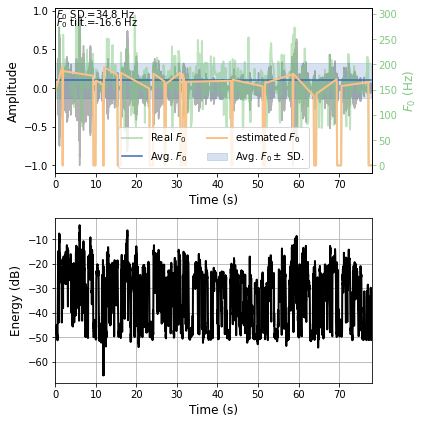

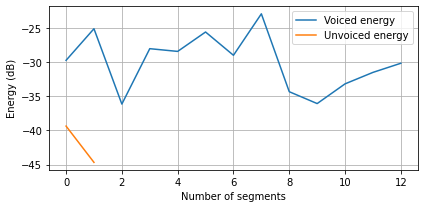

(1, 103)


In [ ]:
# file_audio="/content/drive/My\ Drive/Colab\ Notebooks/audio/wavfiles/pitt/Dementia/001-2.wav"
file_audio="wavfiles/madress/train/adrso002.wav"

prosodyf=Prosody()
prosodyf.size_frame=1.0
prosodyf.step=0.1


features1=prosodyf.extract_features_file(file_audio, static=True, plots=True, fmt="csv")
print(features1.shape)

/usr/local/lib/python3.8/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = np.array(c)


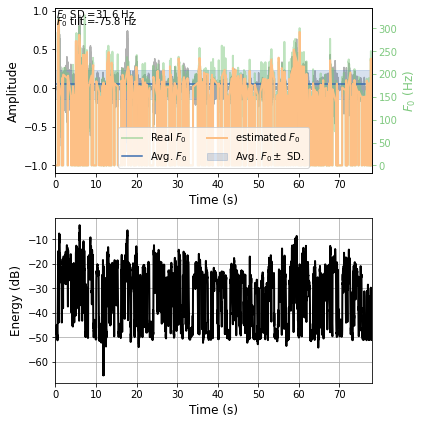

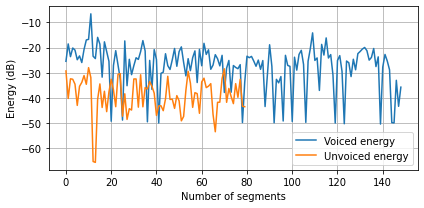

(1, 103)


In [ ]:
# file_audio="/content/drive/My\ Drive/Colab\ Notebooks/audio/wavfiles/pitt/Dementia/001-2.wav"
file_audio="wavfiles/madress/train/adrso002.wav"

prosodyf=Prosody()
# prosodyf.size_frame=1.0
# prosodyf.step=0.1


features1=prosodyf.extract_features_file(file_audio, static=True, plots=True, fmt="csv")
print(features1.shape)

/usr/local/lib/python3.8/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = np.array(c)


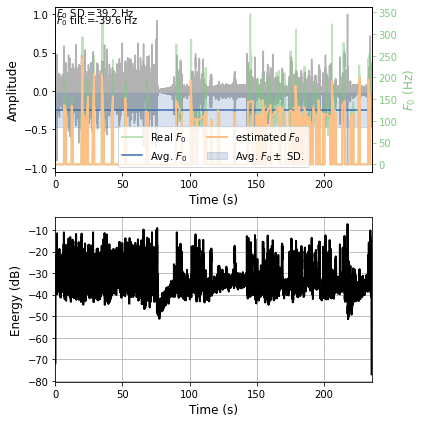

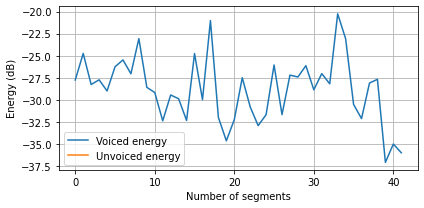

(1, 103)


In [ ]:
# file_audio="/content/drive/My\ Drive/Colab\ Notebooks/audio/wavfiles/pitt/Dementia/001-2.wav"
file_audio="wavfiles/madress/train/adrso024.wav"

prosodyf=Prosody()
prosodyf.size_frame=1.0
prosodyf.step=0.1


features1=prosodyf.extract_features_file(file_audio, static=True, plots=True, fmt="csv")
print(features1.shape)

/usr/local/lib/python3.8/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = np.array(c)


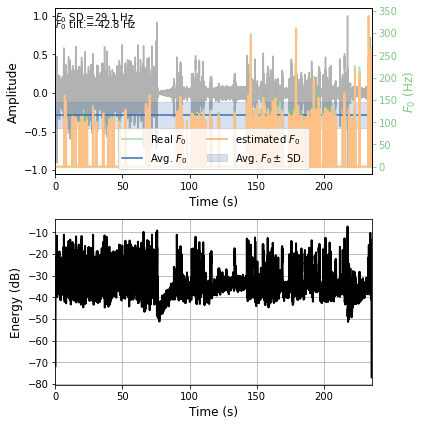

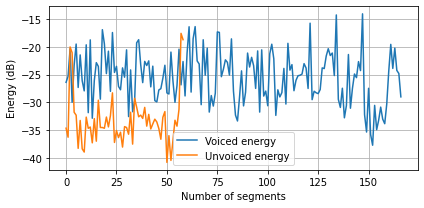

(1, 103)


In [ ]:
# file_audio="/content/drive/My\ Drive/Colab\ Notebooks/audio/wavfiles/pitt/Dementia/001-2.wav"
file_audio="wavfiles/madress/train/adrso024.wav"

prosodyf=Prosody()
# prosodyf.size_frame=1.0
# prosodyf.step=0.1


features1=prosodyf.extract_features_file(file_audio, static=True, plots=True, fmt="csv")
print(features1.shape)

In [ ]:
# file_audio="/content/drive/My\ Drive/Colab\ Notebooks/audio/wavfiles/pitt/Dementia/001-2.wav"
import os
name="Alford_Main_05.wav"
# name="Abbott_Maddock_01.wav"
path="wavfiles/CCC/"
print(os.getcwd())
file_audio=path+name

prosodyf=Prosody()

features1=prosodyf.extract_features_file(file_audio, static=True, plots=True, fmt="csv")
print(features1.shape)

/content


FileNotFoundError: ignored

In [ ]:
path = "wavfiles/ccc/"

wav_include=pd.read_csv('ccc_include_wav_file.csv')
audio=pd.read_csv('ccc_audio_new.csv')
include=set(wav_include['filename'])-set(audio['filename'])
print(include)
print(len(include))
# print(len(wav_include))
# print(wav_include['filename'])
# wav={'filename':[]}
# for (root, dirs, file) in os.walk(path):
#   for filename in file:
#     if filename.split('.')[0]  in wav_include['filename'].values.tolist():
#       wav['filename'].append(filename.split('.')[0])
# save_file(pd.DataFrame(wav),'wav_include')






{'Alford_Martin_04', 'Tichenor_Cunar_001', 'Tichenor_Pardu_001', 'Appleby_Main--_04', 'Temes_Wash_001_02', 'Tatter_Allen_001', 'Tichenor_Payne_002', 'Walton_Caldw_001', 'Yarrow_Milli_001', 'Alford_Main_06', 'Tichenor_Page_001', 'Atkins_May_01', 'Appleby_Main--_07', 'Tichenor_Good_002', 'Alford_Main_01', 'Tichenor_Litt_001', 'Atherton_Masten_01', 'Tichenor_Lawre_002', 'Appleby_Manser_01', 'Appleby_Main--_02', 'Annan_Merle_02', 'Appleby_Main--_03', 'Atherton_Masten_02', 'Adrian_Mans_09', 'Yarrow_Quill_001', 'Alford_Main_07', 'Atherton_Merton_01', 'Appleby_Main--_01', 'Waite_Stefa_001_01', 'Tichenor_Longg_001', 'Alsop_Mallery_02', 'Ascall_Mather_05', 'Tichenor_Over_001', 'Alford_Main_03', 'Alford_Main_02', 'Alford_Martin_01', 'Adrian_Mans_02', 'Atherton_Masten_03', 'Tichenor_Knech_001', 'Yager_Hayes_001', 'Tichenor_Dolph_001_02', 'Tichenor_Good_001', 'Appleby_Main--_06', 'Appleby_Main--_05', 'Alford_Martin_02', 'Ascall_Mather_04', 'Walton_Dingl_001', 'Ascall_Mather_06', 'Adrian_Mans_05', 

In [ ]:
file_audio="wavfiles/pitt/Control/006-2.wav"

prosodyf=Prosody()

features1=prosodyf.extract_features_file(file_audio, static=True, plots=True, fmt="csv")
print(features1.shape)

NameError: ignored

In [ ]:
print(features1)
df=pd.DataFrame(features1)

        F0avg      F0std       F0max  ...       VVU       VP        UP
0  115.535957  21.381729  308.777222  ...  0.742747  0.44187  0.153044

[1 rows x 103 columns]


# **navigate files and generate prosody feat.**

In [ ]:
import os
import pandas as pd
path = "wavfiles/adrc/"
# path= "/content/drive/My\ Drive/Colab\ Notebooks/audio/"
# audio=pd.read_csv('pitt_audio.csv')
# segment=pd.read_csv('pitt_segment.csv')

# print(files1)
# files1=list(files1)
# df=None
# # df7=pd.read_csv("ccc_ling_audio.csv")
# df8=pd.read_csv("ccc_files.csv")
# print(len(include))
# result={'filename':list(include)}
# save_file(pd.DataFrame(include),'ccc_include_wav_file')
# for folder in [ 'Dementia','Control']:
# print(folder)
# wav_include=pd.read_csv('wav_include.csv')
# exclude=audio['filename'].values.tolist()
# include=['Ascall_Merton_06.wav','Ascall_Merton_03.wav','Tichenor_Payne_001.wav']
# include=list(set(segment['filename'])-set(audio['filename']))
# print(len(include))
# print(include)
for folder in ['']:
  audio=None
  for (root, dirs, file) in os.walk(path+folder+"/"):
    for filename in file:
      if not filename.endswith('.wav'):
        continue
      # print('hi')

      # if filename.split('.')[0] not in include:
        # continue


      name=filename.split('.')[0]


      #files in ccc dataset we r working with, alredy converrted to wav , but not yet processed for features
      # if name.split('.')[0] in df8['filename'].values.tolist() and name not in audio['filename'].values.tolist():
      # if name in include:
        # print(filename)


      print('processing file %s'%(filename))



        # if not filename.endswith('.csv'):
        #   continue

      # try:
      # print('processing file %s'%(filename))
      # features1=pd.read_csv(filename)
      # features1['filename']=fname
      prosodyf=Prosody()
      features1=prosodyf.extract_features_file(path+folder+"/"+filename, static=True, plots=False, fmt="csv")
      # save_file(pd.DataFrame(features1),'ccc_indiv_'+name)

      df1=pd.DataFrame(features1)
      df1['filename']=name
      # print(len(audio))
      if audio is not None:
        audio_new=pd.concat([audio,features1])
        audio=audio_new
      else:
        audio=df1
      # print(len(audio))
      # break
      # except :
      #     print('exception')
      #     print(filename)
        # if df is None and features1 is not None:

        #   df=pd.DataFrame(features1)
        #   df['filename']=filename.split('.')[0]
        # else:
        #   if df is None and features1 is not None:

        #     df1=pd.DataFrame(features1)
        #     df1['filename']=filename.split('.')[0]
        # if df is not None and df1 is not None:
        #   df2=pd.concat([df,df1],axis=0)
        #   df=df2

  save_file(audio,'adrc_prosody_'+str('test'))

# include=set(df8['filename'])-set(audio['filename'])
# print(include)








processing file 2764_NormalText-Part1_10-15-20.wav
processing file 3454_NormalText_8-10-20.wav
processing file 3460_NormalText_02-26-21.wav
processing file 3253_NormalText_02-04-21.wav
processing file 3425_NormalText_Interview_1-29-21.wav
processing file 3461_NormalText_2-26-2021.wav
processing file 3351_NormalText_7-28-20.wav
processing file 0040_NormalText_8-4-20.wav


/usr/local/lib/python3.9/dist-packages/disvoice/prosody/prosody_functions.py:210: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  E0skw=st.skew(log_energy_contour)
/usr/local/lib/python3.9/dist-packages/disvoice/prosody/prosody_functions.py:211: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  E0ku=st.kurtosis(log_energy_contour)


processing file 2764_NormalText-Part2_10-15-20.wav
processing file 3446_NormalText_11-05-20.wav


/usr/local/lib/python3.9/dist-packages/disvoice/prosody/prosody_functions.py:210: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  E0skw=st.skew(log_energy_contour)
/usr/local/lib/python3.9/dist-packages/disvoice/prosody/prosody_functions.py:211: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  E0ku=st.kurtosis(log_energy_contour)


processing file 3480_NormalText_03-31-21.wav
processing file 3455_NormalText_8-5-20.wav
processing file 3257_NormalText_12-17-2020.wav
processing file 3440_NormalText_Interview_08-07-20.wav
processing file 3373_NormalText_03-11-21.wav
processing file 3538_NormalText_8-25-20.wav
processing file 3657_NormalText_7-31-20.wav


/usr/local/lib/python3.9/dist-packages/disvoice/prosody/prosody_functions.py:229: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  Elskw=st.skew(log_energy_contour)
/usr/local/lib/python3.9/dist-packages/disvoice/prosody/prosody_functions.py:230: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  Elku=st.kurtosis(log_energy_contour)


processing file 3564_NormalText_8-14-20.wav
processing file 3633_NormalText_1-13-21.wav
processing file 3662_Interview_8-3-20.wav
processing file 3572_NormalText_7-23-20.wav
processing file 3603_Consent_NormalText_Interview_10-09-20.wav
processing file 3662_NormalText_8-3-20.wav


/usr/local/lib/python3.9/dist-packages/disvoice/prosody/prosody_functions.py:210: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  E0skw=st.skew(log_energy_contour)
/usr/local/lib/python3.9/dist-packages/disvoice/prosody/prosody_functions.py:211: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  E0ku=st.kurtosis(log_energy_contour)


processing file 3672_Consent_NormalText_Interview_10-19-20.wav


/usr/local/lib/python3.9/dist-packages/disvoice/prosody/prosody_functions.py:229: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  Elskw=st.skew(log_energy_contour)
/usr/local/lib/python3.9/dist-packages/disvoice/prosody/prosody_functions.py:230: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  Elku=st.kurtosis(log_energy_contour)


processing file 3572_NormalText_7-23-20(2).wav


/usr/local/lib/python3.9/dist-packages/disvoice/prosody/prosody_functions.py:210: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  E0skw=st.skew(log_energy_contour)
/usr/local/lib/python3.9/dist-packages/disvoice/prosody/prosody_functions.py:211: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  E0ku=st.kurtosis(log_energy_contour)


processing file 3632_NormalText_9-16-20.wav
processing file 3675_NormalText_8-28-2020.wav
processing file 3536_NormalText_Interview_11-23-20.wav
processing file 3559_NormalText_10-8-20.wav
processing file 3601_NormalText_1-25-2021.wav
processing file 3663_NormalText_8-10-20.wav
processing file 3483_Interview_NormalText_08-28-20.wav
processing file 3521_NormalText_02-03-21.wav
processing file 3661_NormalText_02-18-21.wav
processing file 3562_NormalText-Part1_02-03-21.wav
processing file 3546_NormalText_02-10-21.wav
processing file 3562_NormalText-Part2_02-03-21.wav
processing file 3652_NormalText_8-31-20.wav
processing file 3677_NormalText_7-24-20.wav
processing file 3510_NormalText_8-6-20.wav
processing file 3642_NormalText_Interview_10-19-20.wav
processing file 3600_Interview+NormalText_4-2-21.wav


/usr/local/lib/python3.9/dist-packages/disvoice/prosody/prosody_functions.py:229: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  Elskw=st.skew(log_energy_contour)
/usr/local/lib/python3.9/dist-packages/disvoice/prosody/prosody_functions.py:230: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  Elku=st.kurtosis(log_energy_contour)


processing file 3574_NormalText_9-11-20.wav
processing file 3641_NormalText_8-19-20 .wav
processing file 3660_Consent_ Interview_NormalText_2-17-21.wav
processing file 3665_NormalText_Interview_10-12-20.wav
processing file 3622_NormalText_9-8-20.wav


/usr/local/lib/python3.9/dist-packages/disvoice/prosody/prosody_functions.py:210: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  E0skw=st.skew(log_energy_contour)
/usr/local/lib/python3.9/dist-packages/disvoice/prosody/prosody_functions.py:211: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  E0ku=st.kurtosis(log_energy_contour)
/usr/local/lib/python3.9/dist-packages/disvoice/prosody/prosody_functions.py:229: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  Elskw=st.skew(log_energy_contour)
/usr/local/lib/python3.9/dist-packages/disvoice/prosody/prosody_functions.py:230: RuntimeWarning: Precision loss occurred in momen

processing file 3607_NormalText_Interview_2-5-21.wav


/usr/local/lib/python3.9/dist-packages/disvoice/prosody/prosody_functions.py:210: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  E0skw=st.skew(log_energy_contour)
/usr/local/lib/python3.9/dist-packages/disvoice/prosody/prosody_functions.py:211: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  E0ku=st.kurtosis(log_energy_contour)


processing file 3545_Interview_NormalText_08-14-20.wav
processing file 3658_NormalText_4-9-2021.wav
processing file 3610_NormalText_01-19-21.wav
processing file 3715_NormalText_01-15-21.wav
processing file 3773_Interview-ONLY_9-3-20.wav
processing file 3703_NormalText_10-7-20.wav


/usr/local/lib/python3.9/dist-packages/disvoice/prosody/prosody_functions.py:210: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  E0skw=st.skew(log_energy_contour)
/usr/local/lib/python3.9/dist-packages/disvoice/prosody/prosody_functions.py:211: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  E0ku=st.kurtosis(log_energy_contour)


processing file 3692_NormalText_Interview_10-16-20.wav
processing file 3700_NormalText_2-16-2021.wav
processing file 3680_Consent_NormalText_Interview_10-05-20.wav
processing file 3781_NormalText_10-21-20.wav
processing file 3734_Interview_NormalText_10-09-20.wav
processing file 3766_NormalText_8-3-20.wav
processing file 3724_NormalText_7-30-20.wav
processing file 3735_NormalText_8-28-20.wav


/usr/local/lib/python3.9/dist-packages/disvoice/prosody/prosody_functions.py:229: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  Elskw=st.skew(log_energy_contour)
/usr/local/lib/python3.9/dist-packages/disvoice/prosody/prosody_functions.py:230: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  Elku=st.kurtosis(log_energy_contour)


processing file 3747_Interview_NormalText_11-13-20.wav
processing file 3765_NormalText_8-3-20.wav
processing file 3758_NormalText_8-11-20.wav
processing file 3716_NormalText_1-14-21.wav
processing file 3769_NormalText_8-18-20.wav
processing file 3744_Consent_NormalText_Interview_10-09-20.wav
processing file 3718_Consent_Interview_NormalText_10-12-20.wav


/usr/local/lib/python3.9/dist-packages/disvoice/prosody/prosody_functions.py:210: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  E0skw=st.skew(log_energy_contour)
/usr/local/lib/python3.9/dist-packages/disvoice/prosody/prosody_functions.py:211: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  E0ku=st.kurtosis(log_energy_contour)
/usr/local/lib/python3.9/dist-packages/disvoice/prosody/prosody_functions.py:210: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  E0skw=st.skew(log_energy_contour)
/usr/local/lib/python3.9/dist-packages/disvoice/prosody/prosody_functions.py:211: RuntimeWarning: Precision loss occurred in momen

processing file 3746_NormalText_11-13-20.wav
processing file 3763_NormalText_8-11-20.wav
processing file 3714_Consent_Interview_NormalText_7-24-20.wav
processing file 3768_NormalText_8-21-20.wav
processing file 3760_NormalText_12-14-2020.wav


/usr/local/lib/python3.9/dist-packages/disvoice/prosody/prosody_functions.py:210: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  E0skw=st.skew(log_energy_contour)
/usr/local/lib/python3.9/dist-packages/disvoice/prosody/prosody_functions.py:211: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  E0ku=st.kurtosis(log_energy_contour)


processing file 3688_NormalText_10-13-20.wav
processing file 3731_NormalText_03-01-21.wav


/usr/local/lib/python3.9/dist-packages/disvoice/prosody/prosody_functions.py:63: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  f0lskw=st.skew(F0nzlist[-1])
/usr/local/lib/python3.9/dist-packages/disvoice/prosody/prosody_functions.py:64: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  f0lku=st.kurtosis(F0nzlist[-1])


processing file 3745_NormalText_7-28-20.wav
processing file 3721_NormalText_02-08-21.wav
processing file 3738_NormalText_8-5-20.wav


/usr/local/lib/python3.9/dist-packages/disvoice/prosody/prosody_functions.py:210: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  E0skw=st.skew(log_energy_contour)
/usr/local/lib/python3.9/dist-packages/disvoice/prosody/prosody_functions.py:211: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  E0ku=st.kurtosis(log_energy_contour)


processing file 3774_NormalText_9-14-20.wav
processing file 3722_NormalText_3-1-2021.wav
processing file 3803_Consent_Interview_NormalText_1-8-21.wav
processing file 3784_NormalText_Interview_09-18-20.wav


/usr/local/lib/python3.9/dist-packages/disvoice/prosody/prosody_functions.py:229: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  Elskw=st.skew(log_energy_contour)
/usr/local/lib/python3.9/dist-packages/disvoice/prosody/prosody_functions.py:230: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  Elku=st.kurtosis(log_energy_contour)


processing file 8218_NormalText_7-23-20.wav
processing file 3795_NormalText_11-17-20.wav


/usr/local/lib/python3.9/dist-packages/disvoice/prosody/prosody_functions.py:229: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  Elskw=st.skew(log_energy_contour)
/usr/local/lib/python3.9/dist-packages/disvoice/prosody/prosody_functions.py:230: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  Elku=st.kurtosis(log_energy_contour)


processing file 8264_NormalText_9-17-20.wav
processing file 3811_NormalText_03-05-21.wav


/usr/local/lib/python3.9/dist-packages/disvoice/prosody/prosody_functions.py:210: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  E0skw=st.skew(log_energy_contour)
/usr/local/lib/python3.9/dist-packages/disvoice/prosody/prosody_functions.py:211: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  E0ku=st.kurtosis(log_energy_contour)


processing file 3797_NormalText_11-19-20.wav
processing file 3799_Consent_Interview_NormalText_11-20-20.wav
processing file 3801_NormalText_1-22-2021.wav
processing file 3816_Consent_Interview_NormalText_09-25-20.wav
processing file 3798_NormalText_11-20-20.wav


/usr/local/lib/python3.9/dist-packages/disvoice/prosody/prosody_functions.py:210: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  E0skw=st.skew(log_energy_contour)
/usr/local/lib/python3.9/dist-packages/disvoice/prosody/prosody_functions.py:211: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  E0ku=st.kurtosis(log_energy_contour)


processing file 3807_NormalText_11-20-2020.wav
processing file 3838_NormalText_7-30-20.wav
processing file 3823_NormalText_10-20-2020.wav
processing file 3802_NormalText_11-18-20.wav
processing file 3851_NormalText_01-22-21.wav


/usr/local/lib/python3.9/dist-packages/disvoice/prosody/prosody_functions.py:210: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  E0skw=st.skew(log_energy_contour)
/usr/local/lib/python3.9/dist-packages/disvoice/prosody/prosody_functions.py:211: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  E0ku=st.kurtosis(log_energy_contour)


processing file 3820_Interview_NormalText_11-11-20.wav
processing file 8207_NormalText_10-05-20.wav


NameError: ignored

# **EXTRACT REPRESENTATION FEAT.**

In [ ]:
from replearning import RepLearning
replearning=RepLearning('RAE')
import os
import pandas as pd
path = "wavfiles/adrc/"

for folder in ['']:
  audio=None
  for (root, dirs, file) in os.walk(path+folder+"/"):
    for filename in file:
      if not filename.endswith('.wav'):
        continue
      # print('hi')

      # if filename.split('.')[0] not in include:
        # continue


      name=filename.split('.')[0]





      print('processing file %s'%(filename))




      # prosodyf=Prosody()
      features1=replearning.extract_features_file(path+folder+"/"+filename, static=True, plots=True, fmt="csv")

      # save_file(pd.DataFrame(features1),'ccc_indiv_'+name)

      df1=pd.DataFrame(features1)
      df1['filename']=name
      # print(len(audio))
      if audio is not None:
        audio_new=pd.concat([audio,features1])
        audio=audio_new
      else:
        audio=df1


  save_file(audio,'adrc_rep_'+str('test'))

# **EXTRACT PHONATION FEATURES**

In [ ]:
import os
import pandas as pd
from phonation import Phonation
path = "wavfiles/adrc/"
phonation=Phonation()
for folder in ['']:
  audio=None
  for (root, dirs, file) in os.walk(path+folder+"/"):
    for filename in file:
      if not filename.endswith('.wav'):
        continue
      # print('hi')

      # if filename.split('.')[0] not in include:
        # continue


      name=filename.split('.')[0]





      print('processing file %s'%(filename))




      # prosodyf=Prosody()



    features1=phonation.extract_features_file(path+folder+"/"+filename, static=True, plots=True, fmt="CSV")

      # save_file(pd.DataFrame(features1),'ccc_indiv_'+name)

      df1=pd.DataFrame(features1)
      df1['filename']=name
      # print(len(audio))
      if audio is not None:
        audio_new=pd.concat([audio,features1])
        audio=audio_new
      else:
        audio=df1


  save_file(audio,'adrc_phonation_'+str('test'))

In [ ]:
  save_file(audio,'adrc_audio_'+str('test'))


done


In [ ]:
  save_file(audio,'madress_audio_'+str('test'))


done


In [ ]:
audio.to_csv( path+"ccc_audio" + '.csv')


In [ ]:
print(len(audio))
print(len(list(include)))

227
81


In [ ]:

wav_include=pd.read_csv('wav_include.csv')
for filename in wav_include['filename'].values.tolist():
  try:

    name=filename
    file_audio="wavfiles/ccc/"+name+".wav"

    prosodyf=Prosody()

    features1=prosodyf.extract_features_file(file_audio, static=True, plots=False, fmt="csv")
    print(features1.shape)
    df1=pd.DataFrame(features1)
    features1['filename']=name
    # save_file(df1,'ccc_audio_indiv_'+name)
    break
  except:
    print('filename exception')
    print(name)


/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


filename exception
Walton_Caldw_001
filename exception
Walton_Dingl_001
(1, 103)


In [ ]:
df1=pd.DataFrame(features1)
features1['filename']=name
save_file(df1,'ccc_audio_'+name)


done
